In [4]:
pip install deepface

     |████████████████████████████████| 61 kB 2.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 9.0 MB/s 
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=c5f0aead97922eecfddaac10c423bedb75dddd5a759ff0c4d7628f67068d9761
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import keras
import os
import pandas as pd
from pickle import dump
from deepface import DeepFace
from keras.preprocessing.image import ImageDataGenerator, load_img

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/AiProject/archive.zip

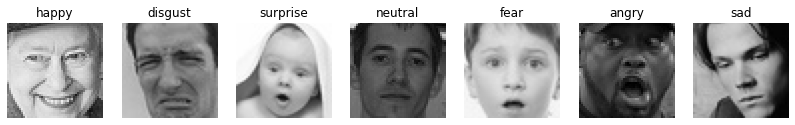

In [11]:
plt.figure(figsize=(14,22))
train_dir = '/content/train/'
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Rectangle across the face**

In [39]:
!cd /content/drive/MyDrive/AiProject/
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

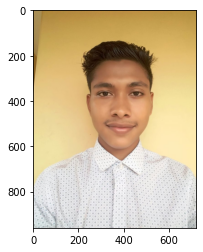

In [41]:

img = cv2.imread('/content/drive/MyDrive/AiProject/minhaz.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [42]:
pred = DeepFace.analyze(img, actions=['emotion'], enforce_detection= False)
#print(pred)
pred['dominant_emotion']

'neutral'

In [16]:
font = cv2.FONT_HERSHEY_COMPLEX
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces =  cascade.detectMultiScale(gray, 1.1, 4)


for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),3)

#cv2.putText(img_sad, pred['dominant_emotion'], (50,50), font, 3, (0,255,0), 2,cv2.LINE_4)


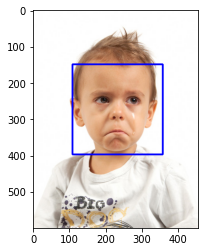

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
pip install pyshine


In [19]:
import pyshine as ps
#img_sad = cv2.imread('/content/drive/MyDrive/AI_emotion_detection/sad-face.jpg')
ps.putBText(img,pred['dominant_emotion'],text_offset_x=20,text_offset_y=20,vspace=10,hspace=10, font_scale=2.3,background_RGB=(110,45,25),text_RGB=(255,225,110), thickness=3)

Warning! No module named 'sounddevice'


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[241, 246, 249],
        [241, 246, 249],
        [241, 246, 249],
        ...,
        [238, 242, 243],
        [240, 244, 245],
        [242, 246, 247]],

       [[238, 243, 246],
        [239, 244, 247],
        [240, 245, 248],
        ...,
        [240, 244, 245],
        [242, 246, 247],
        [243, 247, 248]],

       [[235, 240, 243],
        [236, 241, 244],
        [237, 242, 245],
        ...,
        [241, 245, 246],
        [242, 246, 247],
        [243, 247, 248]]

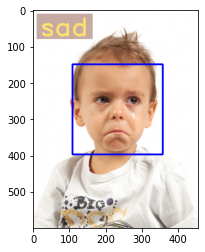

In [21]:
plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Facial emotion recognization from webcam video and image**

In [22]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

**Helper functions**

In [23]:

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [28]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # facial expression predictions
  result = DeepFace.analyze(img, actions=['emotion'], enforce_detection= False)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = cascade.detectMultiScale(gray,1.1, 4)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  ps.putBText(img,result['dominant_emotion'],text_offset_x=20,text_offset_y=20,vspace=10,hspace=10, font_scale=2.3,background_RGB=(110,45,25),text_RGB=(255,225,110), thickness=3)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


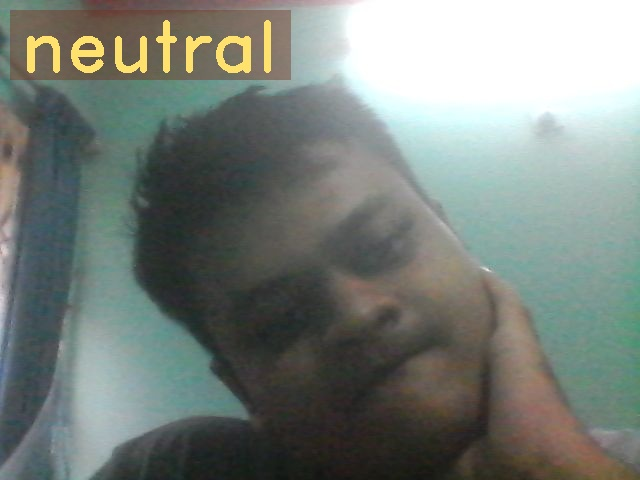

In [29]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Recognization of facial emotion from Webcam video**

In [30]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [27]:

# start streaming video from webcam
video_stream()

label_html = 'Capturing...'
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    #predictions
    result = DeepFace.analyze(img, actions=['emotion'], enforce_detection= True)
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
    
    ps.putBText(bbox_array,result['dominant_emotion'],text_offset_x=20,text_offset_y=20,vspace=10,hspace=10, font_scale=2.3,background_RGB=(110,45,25),text_RGB=(255,225,110), thickness=3)
    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

NameError: ignored

In [ ]:
cam = cv2.VideoCapture(0)

if not cam.isOpened():
  cam = cv2.VideoCapture(1)
if not cam.isOpened():
  raise IOError('cannot access webcam')

while True:
    check, frame = cam.read()

    cv2.imshow('video', frame)

    key = cv2.waitKey(1)
    if key == 27:
        break

cam.release()
cv2.destroyAllWindows()


NameError: ignored

**Model evalution**

In [ ]:
label_map = {'angry': 0 , 'disgust' : 1, 'fear': 2, 'happy': 3, 'neutral': 4,'sad': 5, 'surprise':6}


In [ ]:
import os
y_true = []
y_pred = []
for root, dirs, files in os.walk('/content/test'):
  
  for file in files:
    
    if 'PublicTest' in file:
        cat = label_map[os.path.join(root, file).split('/')[-2]]
        y_true.append(cat)
    
  #for name in dirs:
      #print(os.path.join(root, name).split('/')[-1])
print(len(y_true))
print(y_true)

3589
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [ ]:
for root, dirs, files in os.walk('/content/test'):
  
  for file in files:
    if 'PublicTest' in file:
        img = cv2.imread(os.path.join(root, file))
        pred = DeepFace.analyze(img, actions=['emotion'], enforce_detection=False)
        category = label_map[pred['dominant_emotion']]
        y_pred.append(category)
print(len(y_pred))

3589


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_true, y_pred)*100
print('{0:.2f}'.format(score) + '%')

57.06%


In [ ]:
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad', 'surprise']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       angry       0.52      0.46      0.49       467
     disgust       0.60      0.43      0.50        56
        fear       0.40      0.43      0.42       496
       happy       0.77      0.77      0.77       895
     neutral       0.44      0.53      0.48       607
         sad       0.48      0.44      0.46       653
    surprise       0.78      0.73      0.75       415

    accuracy                           0.57      3589
   macro avg       0.57      0.54      0.55      3589
weighted avg       0.58      0.57      0.57      3589



**Residual masking net**

In [ ]:
pip install rmn

     |████████████████████████████████| 109 kB 30.8 MB/s 
     |████████████████████████████████| 532 kB 31.1 MB/s 


In [ ]:
from rmn import RMN
m = RMN()
#m.video_demo()

image = cv2.imread("/content/drive/MyDrive/AI_emotion_detection/happy.jpg")
results = m.detect_emotion_for_single_frame(image)
print(results)
image = m.draw(image, results)

pretrained_ckpt does not exists!


deploy.prototxt.txt does not exists!


res10_300x300_ssd_iter_140000.caffemodel does not exists!


num faces: 1
[{'xmin': 566, 'ymin': 143, 'xmax': 771, 'ymax': 348, 'emo_label': 'happy', 'emo_proba': 0.9583948850631714, 'proba_list': [{'angry': 0.0003037255955860019}, {'disgust': 5.435636921902187e-05}, {'fear': 0.0002129849453922361}, {'happy': 0.9583948850631714}, {'sad': 0.00026696952409110963}, {'surprise': 0.040639180690050125}, {'neutral': 0.00012800178956240416}]}]


[{'emo_label': 'happy',
  'emo_proba': 0.9583948850631714,
  'proba_list': [{'angry': 0.0003037255955860019},
   {'disgust': 5.435636921902187e-05},
   {'fear': 0.0002129849453922361},
   {'happy': 0.9583948850631714},
   {'sad': 0.00026696952409110963},
   {'surprise': 0.040639180690050125},
   {'neutral': 0.00012800178956240416}],
  'xmax': 771,
  'xmin': 566,
  'ymax': 348,
  'ymin': 143}]

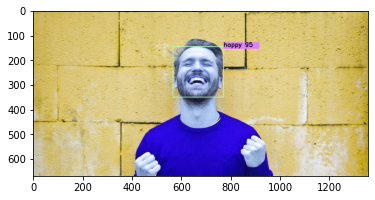

In [ ]:
plt.imshow(image)
results

In [ ]:
y_pred = []
for root, dirs, files in os.walk('/content/test'):
  
  for file in files:
    if 'PublicTest' in file:
        img = cv2.imread(os.path.join(root, file))
        pred = m.detect_emotion_for_single_frame(img)
        pred_cls = pred[0].get('emo_label')
        print(pred_cls)
        print(pred)
        category = label_map[pred_cls]
        y_pred.append(category)
len(y_pred)

num faces: 9
fear
[{'xmin': 16, 'ymin': 15, 'xmax': 65, 'ymax': 64, 'emo_label': 'fear', 'emo_proba': 0.5124436616897583, 'proba_list': [{'angry': 0.1844290792942047}, {'disgust': 0.08655790984630585}, {'fear': 0.5124436616897583}, {'happy': 0.010508060455322266}, {'sad': 0.13106897473335266}, {'surprise': 0.05655079707503319}, {'neutral': 0.018441488966345787}]}]
num faces: 10
angry
[{'xmin': 14, 'ymin': 13, 'xmax': 65, 'ymax': 64, 'emo_label': 'angry', 'emo_proba': 0.7243084907531738, 'proba_list': [{'angry': 0.7243084907531738}, {'disgust': 3.8037698686821386e-05}, {'fear': 0.11524191498756409}, {'happy': 0.10781186074018478}, {'sad': 0.005740610882639885}, {'surprise': 0.04676096513867378}, {'neutral': 9.805519948713481e-05}]}]
num faces: 10
angry
[{'xmin': 17, 'ymin': 15, 'xmax': 64, 'ymax': 62, 'emo_label': 'angry', 'emo_proba': 0.9356691837310791, 'proba_list': [{'angry': 0.9356691837310791}, {'disgust': 0.0007985449628904462}, {'fear': 0.006293979473412037}, {'happy': 0.0021814

IndexError: ignored